In [1]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, datasets

%matplotlib inline

In [2]:
# Download dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Explore train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


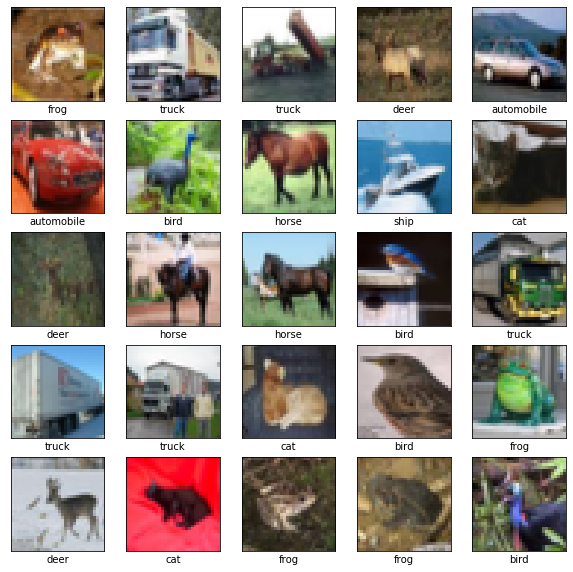

In [5]:
# Show some examples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()  

In [6]:
# Normalize pixel value
X_train, X_test = X_train / 255.0, X_test / 255.0 

In [13]:
# Build model
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #layers.Dropout(0.2),
    layers.Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #layers.Dropout(0.2),
    layers.Dense(len(class_names), activation = 'softmax')
])

In [14]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer = 'adam',
             metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [17]:
history = model.fit(X_train, y_train, epochs = 100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 10s 242us/sample - loss: 1.8134 - acc: 0.6776 - val_loss: 1.8621 - val_acc: 0.6259
Epoch 2/100
40000/40000 [==============================] - 9s 221us/sample - loss: 1.8103 - acc: 0.6801 - val_loss: 1.8469 - val_acc: 0.6422
Epoch 3/100
40000/40000 [==============================] - 8s 201us/sample - loss: 1.8062 - acc: 0.6840 - val_loss: 1.8637 - val_acc: 0.6234
Epoch 4/100
40000/40000 [==============================] - 8s 201us/sample - loss: 1.7990 - acc: 0.6913 - val_loss: 1.8380 - val_acc: 0.6495
Epoch 5/100
40000/40000 [==============================] - 8s 199us/sample - loss: 1.7950 - acc: 0.6949 - val_loss: 1.8580 - val_acc: 0.6310
Epoch 6/100
40000/40000 [==============================] - 8s 199us/sample - loss: 1.7885 - acc: 0.7006 - val_loss: 1.8276 - val_acc: 0.6607
Epoch 7/100
40000/40000 [==============================] - 8s 197us/sample - loss: 1.7852 - acc: 0.7046

40000/40000 [==============================] - 8s 193us/sample - loss: 1.6809 - acc: 0.8047 - val_loss: 1.7974 - val_acc: 0.6864
Epoch 59/100
40000/40000 [==============================] - 8s 193us/sample - loss: 1.6761 - acc: 0.8098 - val_loss: 1.7981 - val_acc: 0.6866
Epoch 60/100
40000/40000 [==============================] - 8s 197us/sample - loss: 1.6770 - acc: 0.8092 - val_loss: 1.7914 - val_acc: 0.6926
Epoch 61/100
40000/40000 [==============================] - 8s 204us/sample - loss: 1.6806 - acc: 0.8051 - val_loss: 1.7950 - val_acc: 0.6906
Epoch 62/100
40000/40000 [==============================] - 8s 193us/sample - loss: 1.6735 - acc: 0.8123 - val_loss: 1.7896 - val_acc: 0.6963
Epoch 63/100
40000/40000 [==============================] - 8s 195us/sample - loss: 1.6745 - acc: 0.8110 - val_loss: 1.7933 - val_acc: 0.6902
Epoch 64/100
40000/40000 [==============================] - 8s 193us/sample - loss: 1.6709 - acc: 0.8148 - val_loss: 1.7943 - val_acc: 0.6904
Epoch 65/100
40000/

In [19]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test lost: %.2f' %(score[0]))
print('Test accuracy: %.2f%%' %(score[1]*100))

Test lost: 1.80
Test accuracy: 68.12%


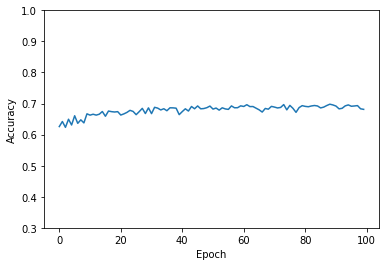

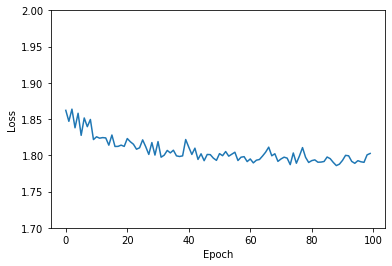

In [22]:
# Visualize history

plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.show()

plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1.7, 2])
plt.show()

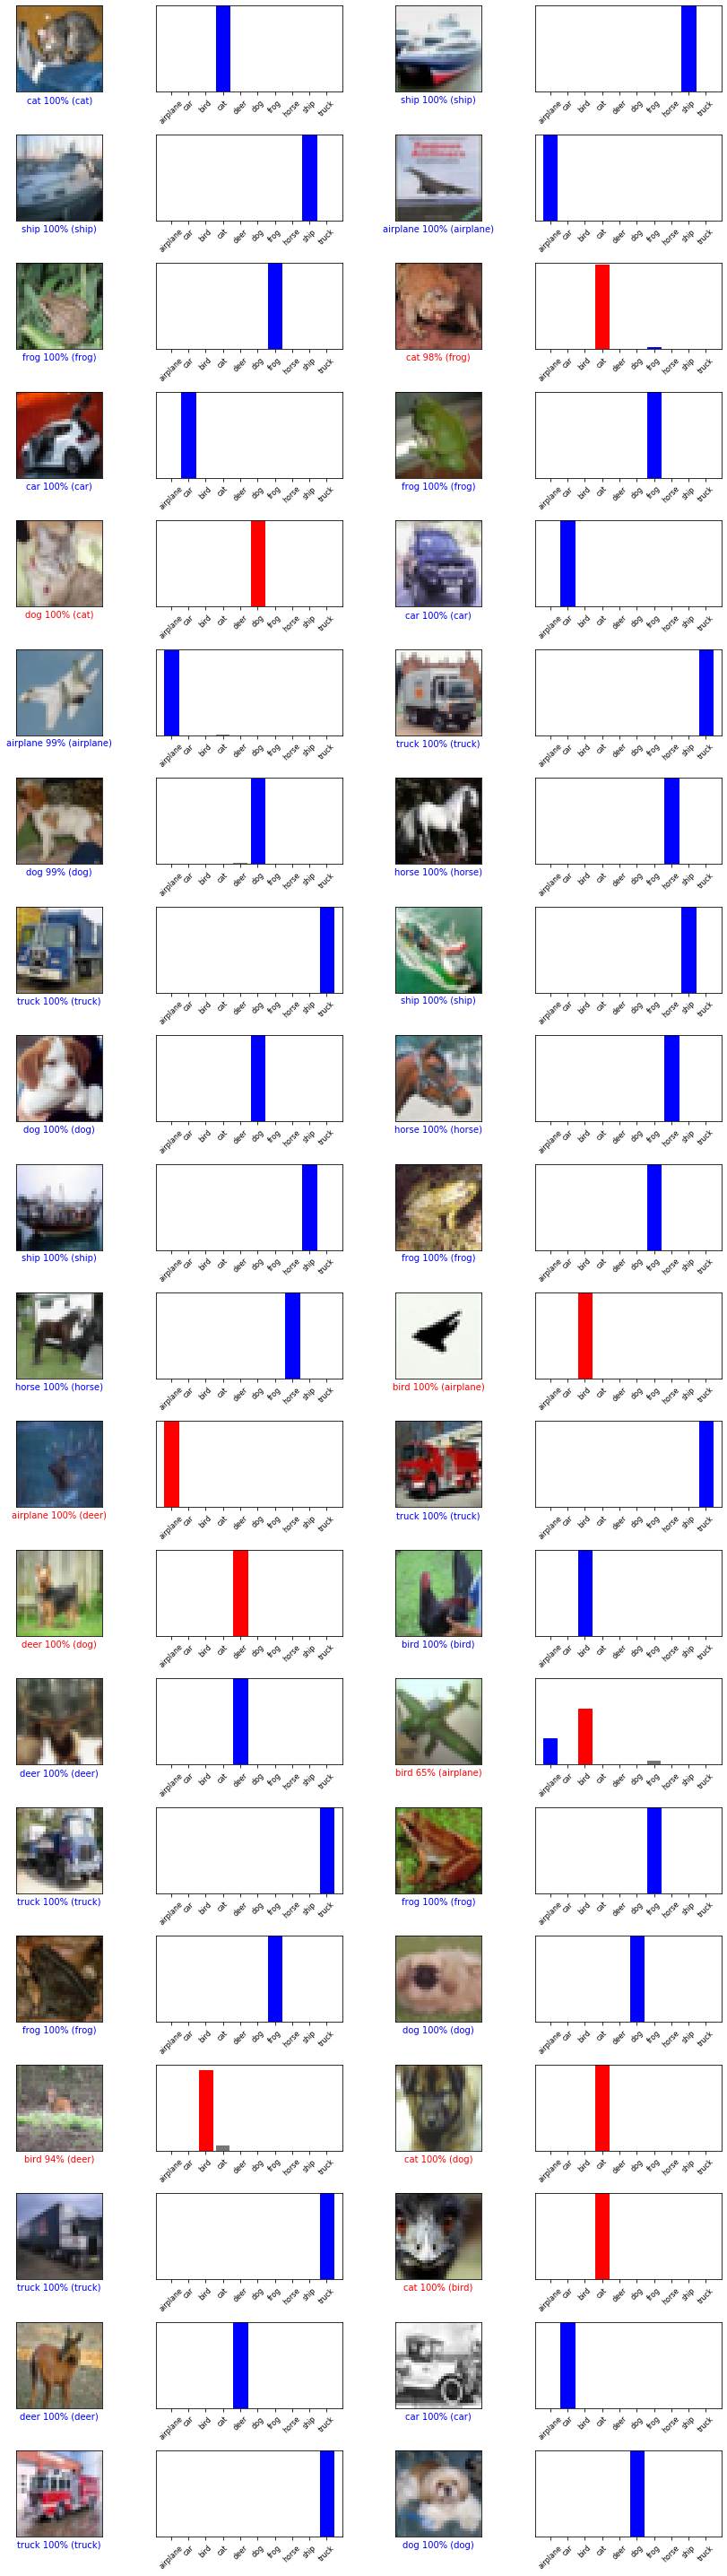

In [42]:
# Predict some examples
predictions = model.predict(X_test)

class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation = 45, fontsize = 8)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
num_rows = 20
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()